### **1. Training With A Classifier Algorithm**

To reiterate, a classifier algorithm is a type of machine learning model that assigns labels(or class) to input data based on learned patterns. It falls under supervised learning, where the model learns from labeled(target/class) training data to make predictions on unseen data.

In simple terms;
The algorithm learns from a dataset containing features (X) and labels (y). It identifies patterns in the features that help distinguish between different classes.

Lets practice...


We will be using a default dataset from Scikit learn for illustration. The dataset is already cleaned, so we would leave out most of  the preprocessing and feature engineering  phase.

##### **Load the data**





In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.ensemble import RandomForestClassifier  # Classification algorithm
from sklearn.datasets import load_iris  # Built-in dataset

In [3]:
# Step 1: Load the dataset
iris = load_iris()  # Load the Iris dataset from sklearn
X = iris.data  # Feature variables (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species of iris flower)

In [4]:
# Convert to DataFrame for easy visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y  # Add the target labels to the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Step 2: Split the dataset into training and testing sets
# The dataset is split into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (120, 4)
Testing Data Shape: (30, 4)


In [6]:
# Lets check the unique classes in the target column
np.unique(y)
# from the output, it shows that we have 3 classes

array([0, 1, 2])

##### **Train Algorithm**

In [7]:
# Step 3: Train the classifier algorithm

# We use a Random Forest Classifier with 100 decision trees
clf = RandomForestClassifier(n_estimators=100, random_state=234)
clf.fit(X_train, y_train)  # Train the algorithm on the training data


RandomForestClassifier(random_state=234)

##### **Predict y_test**

In [8]:
# Step 4: Make prediction with model using the X_test data
y_pred = clf.predict(X_test)  # Predict class labels for the test data
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [9]:
 # Step 5: Compare actual vs predicted results
df_results = pd.DataFrame({'Actual(y)': y_test, 'Predicted(y)': y_pred})
print("\nActual vs Predicted Values:\n")
df_results.head()


Actual vs Predicted Values:



,Actual(y),Predicted(y)
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


###**2. Training With A Regressor Algorithm**

Regression is a type of supervised learning used to predict continuous values. Lets train  the algorithm using the califonia median house price dataset. We a re loading the data from scikit learn dataset.

##### **Load the data**

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Load the dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # Convert to a Pandas DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#####**Train Algorithm**

In [12]:
# Define features (X) and target variable (y)
X = df.drop(columns=['MedHouseVal'])  # Independent variables
y = df['MedHouseVal']  # Dependent variable (house price)

In [13]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [15]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=234)

In [16]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


X_train: (16512, 8)
X_test: (4128, 8)
y_train: (16512,)
y_test: (4128,)


In [17]:
# Initialize algorithm and train
regressor = RandomForestRegressor(n_estimators=100, random_state=234)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=234)

#####**Predict y_test**

In [18]:
# LEts predict MedHouseVal
y_pred = regressor.predict(X_test)
y_pred

array([2.25991  , 4.6212555, 3.3205402, ..., 1.4617   , 1.9182   ,
       1.26878  ])

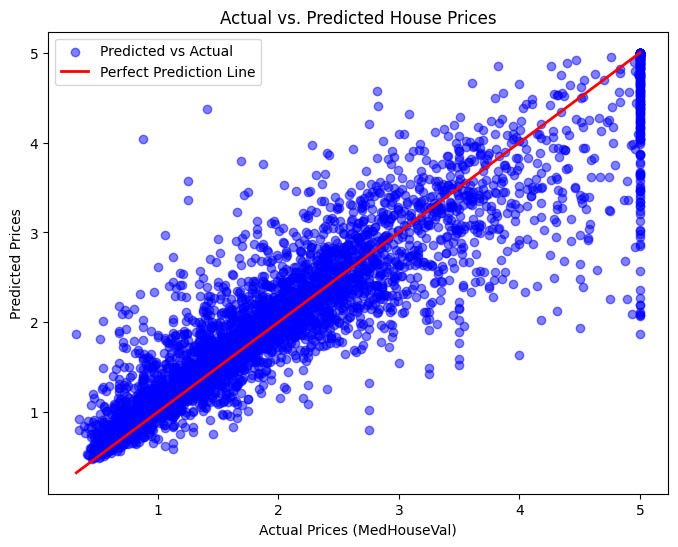

In [19]:
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Prices (MedHouseVal)")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.legend()
plt.show()

In [20]:
#Compare actual vs predicted results vs Difference
df_results = pd.DataFrame({'Actual(y)': y_test,'Predicted(y)': y_pred,'Difference': abs(y_test - y_pred)})
print("\nActual vs Predicted Values with Difference:\n")
df_results.head()



Actual vs Predicted Values with Difference:



,Actual(y),Predicted(y),Difference
10851,1.61000,2.259910,0.649910
5486,5.00001,4.621255,0.378755
8813,3.96400,3.320540,0.643460
4600,1.18100,1.873280,0.692280
13854,0.93400,1.194990,0.260990


In [21]:
# Lets save this table, it will come in handy later in the course
df_results.to_csv("df_results.csv", index=False)

### **3. Training With A Chain Of Regressor Algorithms**

Now that we have been exposed to ML model training, let me add a little complexity to the training, here I am adding feature scaling and multiple regressors.
We are still working with the same dataset.

##### **Load the data**

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

In [23]:
# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target  # Target column

#####**Feature Engineering**

In [24]:
# Split data into features and target
X = df.drop(columns=['target'])
y = df['target']

In [25]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#####**Train Algorithm**

In [27]:
# Initialize regressors
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
}

In [28]:
# Before we train our model, lets create a condition for look out for those algorithms that are sensitive to scaling
predictions = {}
for name, model in models.items():
    # Use scaled data for models that are sensitive to feature scales
    if name in ['Support Vector Regression', 'KNeighbors Regression']:
        X_train_model, X_test_model = X_train_scaled, X_test_scaled
    else:
        X_train_model, X_test_model = X_train, X_test

    model.fit(X_train_model, y_train)
    preds = model.predict(X_test_model)
    predictions[name] = preds

#####**View Prediction**

In [29]:
# Lets create a DataFrame to compare predictions

predictions_df = pd.DataFrame(predictions)
predictions_df['True Value'] = y_test.values
predictions_df.reset_index(drop=True, inplace=True)

predictions_df.head()

,Linear Regression,Ridge Regression,Random Forest,Decision Tree,Support Vector Regressor,K-Nearest Neighbors,True Value
0,0.719123,0.719240,0.509500,0.41400,1.748397,1.6230,0.47700
1,1.764017,1.763951,0.741610,1.20300,1.775613,1.0822,0.45800
2,2.709659,2.709092,4.923257,5.00001,1.887711,2.8924,5.00001
3,2.838926,2.838976,2.529610,2.17000,1.761049,2.2456,2.18600
4,2.604657,2.604768,2.273690,2.25700,1.842868,1.6690,2.78000


### **4. Training With A Chain Of classifier Algorithms**

##### **Load the data**

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [31]:
# Load the Iris dataset as a DataFrame
iris = load_iris(as_frame=True)
df = iris.frame

In [38]:
df.shape

(150, 5)

In [ ]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

#####**Feature Engineering**

In [32]:

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#####**Train Algorithm**

In [33]:
# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'KNeighbors Classifier': KNeighborsClassifier()
}

predictions = {}

# Train each classifier and make predictions on the test set
for name, clf in classifiers.items():
    if name in ['Support Vector Classifier', 'KNeighbors Classifier', 'Logistic Regression']:
        X_train_used, X_test_used = X_train_scaled, X_test_scaled
    else:
        X_train_used, X_test_used = X_train, X_test

    clf.fit(X_train_used, y_train)
    preds = clf.predict(X_test_used)
    predictions[name] = preds


#####**View Prediction**

In [43]:
# Create a DataFrame to compare predictions
predictions_df = pd.DataFrame(predictions, index=y_test.index) # I am matching the index with y_test index
predictions_df['True Label'] = y_test

# Lets get the actual names of the clases using iris.target_names, then map it to the dataframe
target_names = iris.target_names
predictions_df = predictions_df.map(lambda x: target_names[x])
predictions_df.head()

,Logistic Regression,Decision Tree,Random Forest,Support Vector Classifier,KNeighbors Classifier,True Label
73,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
18,setosa,setosa,setosa,setosa,setosa,setosa
118,virginica,virginica,virginica,virginica,virginica,virginica
78,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
76,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor


In [44]:
# Lets pick the pridiction from random tree and the true labe
Rf_pred = predictions_df[["Random Forest","True Label"]]

#Lets save to csv
Rf_pred.to_csv("Rf_pred.csv", index=False)

###**5. Hands On Practice**

1. Load in the diabetes dataset from scikit learn dataset. Use it to train multiple algorithms.
* Preview the dataset, state if you are going to use regressor algorithm  or classifier algorithms to train the model.
* Use the model to predict
* Visualize your prediction(s) using a regression line.
* Compare your prediction(s) using a table.

**Hint**

`from sklearn.datasets import load_diabetes`

2. Load in the wine dataset from scikit learn dataset. Use it to train multiple algorithms.
* Preview the dataset, state if you are going to use regressor algorithm  or classifier algorithms to train the model.
* Use the model to predict
* Visualize your prediction(s) using a regression line.
* Compare your prediction(s) using a table.

**Hint**

`from sklearn.datasets import load_wine`